#  Best Model Exploration for Credit Card Default Prediction in September 2005 in Taiwan
                                                                            Elton Wong, Victoria Zhou, 27 Aug 2019

In [18]:
import pandas as pd
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [19]:
df = pd.read_csv("UCI_Credit_Card.csv")
df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
0,1,20000.0,2,2,1,24,2,2,-1,-1,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,2,120000.0,2,2,2,26,-1,2,0,0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,3,90000.0,2,2,2,34,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,4,50000.0,2,2,1,37,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,5,50000.0,1,2,1,57,-1,0,-1,0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0


# Exploratory Data Analysis

Providing a description of each feature:
    
ID: ID of each client

LIMIT_BAL: Amount of given credit in NT dollars (includes individual and family/supplementary credit

SEX: Gender (1=male, 2=female)

EDUCATION: (1=graduate school, 2=university, 3=high school, 4=others, 5=unknown, 6=unknown)

MARRIAGE: Marital status (1=married, 2=single, 3=others)

AGE: Age in years

PAY_0: Repayment status in September, 2005 (-2: No consumption; -1: Paid in full; 0: The use of revolving credit; 1 = payment delay for one month; 2 = payment delay for two months; . . .; 8 = payment delay for eight months; 9 = payment delay for nine months and above.)

PAY_2: Repayment status in August, 2005 (scale same as above)

PAY_3: Repayment status in July, 2005 (scale same as above)

PAY_4: Repayment status in June, 2005 (scale same as above)

PAY_5: Repayment status in May, 2005 (scale same as above)

PAY_6: Repayment status in April, 2005 (scale same as above)

BILL_AMT1: Amount of bill statement in September, 2005 (NT dollar)

BILL_AMT2: Amount of bill statement in August, 2005 (NT dollar)

BILL_AMT3: Amount of bill statement in July, 2005 (NT dollar)

BILL_AMT4: Amount of bill statement in June, 2005 (NT dollar)

BILL_AMT5: Amount of bill statement in May, 2005 (NT dollar)

BILL_AMT6: Amount of bill statement in April, 2005 (NT dollar)

PAY_AMT1: Amount of previous payment in September, 2005 (NT dollar)

PAY_AMT2: Amount of previous payment in August, 2005 (NT dollar)

PAY_AMT3: Amount of previous payment in July, 2005 (NT dollar)

PAY_AMT4: Amount of previous payment in June, 2005 (NT dollar)

PAY_AMT5: Amount of previous payment in May, 2005 (NT dollar)

PAY_AMT6: Amount of previous payment in April, 2005 (NT dollar)

default.payment.next.month: Default payment (1=yes, 0=no)

###### Check for nulls - none exist

In [20]:
pd.isna(df).any()

ID                            False
LIMIT_BAL                     False
SEX                           False
EDUCATION                     False
MARRIAGE                      False
AGE                           False
PAY_0                         False
PAY_2                         False
PAY_3                         False
PAY_4                         False
PAY_5                         False
PAY_6                         False
BILL_AMT1                     False
BILL_AMT2                     False
BILL_AMT3                     False
BILL_AMT4                     False
BILL_AMT5                     False
BILL_AMT6                     False
PAY_AMT1                      False
PAY_AMT2                      False
PAY_AMT3                      False
PAY_AMT4                      False
PAY_AMT5                      False
PAY_AMT6                      False
default.payment.next.month    False
dtype: bool

In [21]:
#splitting features and labels
X = df.iloc[:,0:-1]
y = df.iloc[:,-1]

Looking at the distribution of labels we were given:

0    23364
1     6636
Name: default.payment.next.month, dtype: int64


Text(0.5, 0, 'Number')

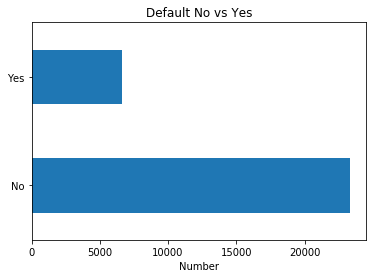

In [22]:
df['default.payment.next.month'].value_counts().plot(kind = "barh")
print(df['default.payment.next.month'].value_counts())
plt.yticks(np.arange(0,2), ('No', 'Yes'))
plt.title('Default No vs Yes')
plt.xlabel('Number')

Look at what kind of people are defaulting

In [23]:
defaulting = df[df['default.payment.next.month'] == 1]
print(len(defaulting))
defaulting.head()

6636


,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
0,1,20000.0,2,2,1,24,2,2,-1,-1,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,2,120000.0,2,2,2,26,-1,2,0,0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
13,14,70000.0,1,2,2,30,1,2,2,0,...,66782.0,36137.0,36894.0,3200.0,0.0,3000.0,3000.0,1500.0,0.0,1
16,17,20000.0,1,1,2,24,0,0,2,2,...,18338.0,17905.0,19104.0,3200.0,0.0,1500.0,0.0,1650.0,0.0,1
21,22,120000.0,2,2,1,39,-1,-1,-1,-1,...,0.0,632.0,316.0,316.0,316.0,0.0,632.0,316.0,0.0,1


([<matplotlib.axis.YTick at 0x1a18af6518>,
 <a list of 2 Text yticklabel objects>)

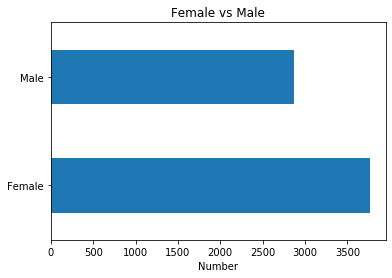

In [24]:
defaulting.SEX.value_counts().plot(kind = "barh")
plt.title('Female vs Male')
plt.xlabel('Number')
plt.yticks(np.arange(0,2),('Female', 'Male'))

Text(0.5, 1.0, 'Defaults by Education Group')

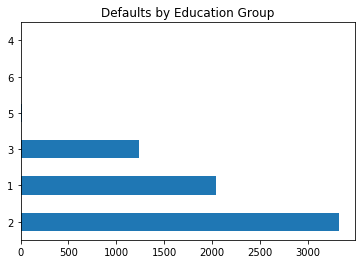

In [25]:
defaulting.EDUCATION.value_counts().plot(kind = "barh")
plt.title('Defaults by Education Group')

([<matplotlib.axis.YTick at 0x1a194e66a0>,
 <a list of 4 Text yticklabel objects>)

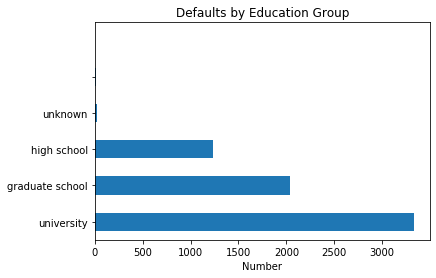

In [26]:
defaulting.EDUCATION.value_counts().plot(kind = "barh")
plt.title('Defaults by Education Group')
plt.xlabel('Number')
plt.yticks(np.arange(0,5),('university','graduate school', 'high school','unknown'))

Text(0.5, 1.0, 'Married vs Single')

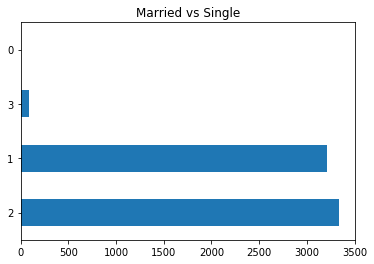

In [27]:
defaulting.MARRIAGE.value_counts().plot(kind = "barh")
plt.title('Married vs Single')

([<matplotlib.axis.YTick at 0x1a19b606a0>,
 <a list of 3 Text yticklabel objects>)

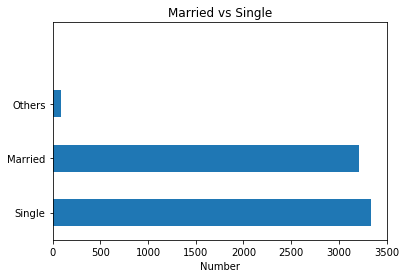

In [28]:
defaulting.MARRIAGE.value_counts().plot(kind = "barh")
plt.title('Married vs Single')
plt.xlabel('Number')
plt.yticks(np.arange(0,3),('Single','Married', 'Others'))

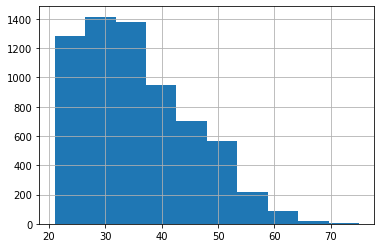

In [29]:
defaulting.AGE.hist()

In [69]:
age_geq_20 = defaulting[defaulting['AGE']>=20]
print(len(age_geq_20))
age_geq_20.head()

6636


,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
0,1,20000.0,2,2,1,24,2,2,-1,-1,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,2,120000.0,2,2,2,26,-1,2,0,0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
13,14,70000.0,1,2,2,30,1,2,2,0,...,66782.0,36137.0,36894.0,3200.0,0.0,3000.0,3000.0,1500.0,0.0,1
16,17,20000.0,1,1,2,24,0,0,2,2,...,18338.0,17905.0,19104.0,3200.0,0.0,1500.0,0.0,1650.0,0.0,1
21,22,120000.0,2,2,1,39,-1,-1,-1,-1,...,0.0,632.0,316.0,316.0,316.0,0.0,632.0,316.0,0.0,1


In [70]:
age_leq_40 = age_geq_20[age_geq_20['AGE']<=40]
print(len(age_leq_40),'\nProportion over all people who default is ', round((len(age_leq_40)/len(defaulting))*100,2),'%')
age_leq_40.head()

4660 
Proportion over all people who default is  70.22 %


,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
0,1,20000.0,2,2,1,24,2,2,-1,-1,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,2,120000.0,2,2,2,26,-1,2,0,0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
13,14,70000.0,1,2,2,30,1,2,2,0,...,66782.0,36137.0,36894.0,3200.0,0.0,3000.0,3000.0,1500.0,0.0,1
16,17,20000.0,1,1,2,24,0,0,2,2,...,18338.0,17905.0,19104.0,3200.0,0.0,1500.0,0.0,1650.0,0.0,1
21,22,120000.0,2,2,1,39,-1,-1,-1,-1,...,0.0,632.0,316.0,316.0,316.0,0.0,632.0,316.0,0.0,1


70.22% is pretty high. Let's dive into the group aged between 20 and 40 inclusive

([<matplotlib.axis.YTick at 0x1a1bdc6780>,
 <a list of 4 Text yticklabel objects>)

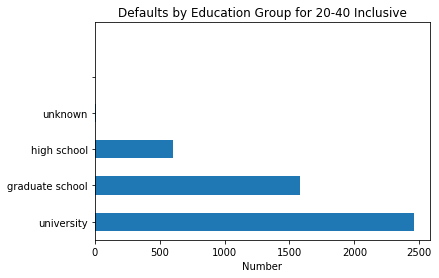

In [71]:
age_leq_40.EDUCATION.value_counts().plot(kind = "barh")
plt.title('Defaults by Education Group for 20-40 Inclusive')
plt.xlabel('Number')
plt.yticks(np.arange(0,5),('university','graduate school', 'high school','unknown'))

([<matplotlib.axis.YTick at 0x1a1be66cf8>,
 <a list of 2 Text yticklabel objects>)

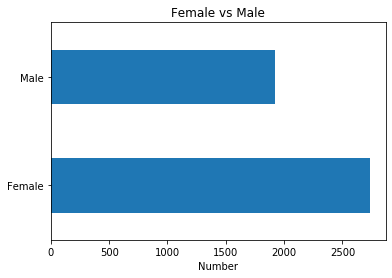

In [72]:
age_leq_40.SEX.value_counts().plot(kind = "barh")
plt.title('Female vs Male')
plt.xlabel('Number')
plt.yticks(np.arange(0,2),('Female', 'Male'))

([<matplotlib.axis.YTick at 0x1a1c016390>,
 <a list of 3 Text yticklabel objects>)

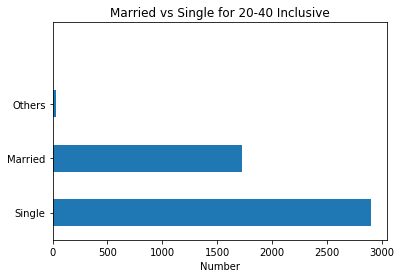

In [73]:
age_leq_40.MARRIAGE.value_counts().plot(kind = "barh")
plt.title('Married vs Single for 20-40 Inclusive')
plt.xlabel('Number')
plt.yticks(np.arange(0,3),('Single','Married', 'Others'))

In [76]:
single_20_and_40 = age_leq_40[age_leq_40['MARRIAGE'] == 2]
print(len(single_20_and_40), '\nProportion over all people who default is ', round((len(single_20_and_40)/len(defaulting))*100,2),'%')
single_20_and_40.head()

2903 
Proportion over all people who default is  43.75 %


,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
1,2,120000.0,2,2,2,26,-1,2,0,0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
13,14,70000.0,1,2,2,30,1,2,2,0,...,66782.0,36137.0,36894.0,3200.0,0.0,3000.0,3000.0,1500.0,0.0,1
16,17,20000.0,1,1,2,24,0,0,2,2,...,18338.0,17905.0,19104.0,3200.0,0.0,1500.0,0.0,1650.0,0.0,1
22,23,70000.0,2,2,2,26,2,0,0,2,...,44006.0,46905.0,46012.0,2007.0,3582.0,0.0,3601.0,0.0,1820.0,1
26,27,60000.0,1,1,2,27,1,-2,-1,-1,...,-57.0,127.0,-189.0,0.0,1000.0,0.0,500.0,0.0,1000.0,1


Looks like singles are more likely to default, let's look at the education parameter for this group

([<matplotlib.axis.YTick at 0x1a1c6816d8>,
 <a list of 4 Text yticklabel objects>)

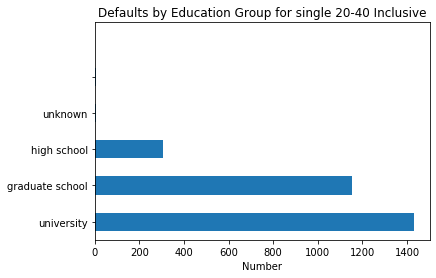

In [77]:
single_20_and_40.EDUCATION.value_counts().plot(kind = "barh")
plt.title('Defaults by Education Group for single 20-40 Inclusive')
plt.xlabel('Number')
plt.yticks(np.arange(0,5),('university','graduate school', 'high school','unknown'))

In [80]:
grad_single_20_and_40 = single_20_and_40[single_20_and_40['EDUCATION'] == 1]
uni_single_20_and_40 = single_20_and_40[single_20_and_40['EDUCATION'] == 2]

uni_and_grad_single_20_and_40 = pd.concat([grad_single_20_and_40,uni_single_20_and_40])
print(len(uni_and_grad_single_20_and_40), '\nProportion over all people who default is ', round((len(uni_and_grad_single_20_and_40)/len(defaulting))*100,2),'%')
uni_and_grad_single_20_and_40.head()

2585 
Proportion over all people who default is  38.95 %


,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
16,17,20000.0,1,1,2,24,0,0,2,2,...,18338.0,17905.0,19104.0,3200.0,0.0,1500.0,0.0,1650.0,0.0,1
26,27,60000.0,1,1,2,27,1,-2,-1,-1,...,-57.0,127.0,-189.0,0.0,1000.0,0.0,500.0,0.0,1000.0,1
38,39,50000.0,1,1,2,25,1,-1,-1,-2,...,0.0,0.0,0.0,780.0,0.0,0.0,0.0,0.0,0.0,1
45,46,210000.0,1,1,2,29,-2,-2,-2,-2,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
46,47,20000.0,2,1,2,22,0,0,2,-1,...,16341.0,16675.0,0.0,3000.0,0.0,16741.0,334.0,0.0,0.0,1


let's look at if there's sex difference

([<matplotlib.axis.YTick at 0x1a1cd1a470>,
 <a list of 2 Text yticklabel objects>)

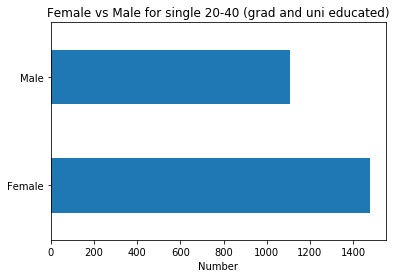

In [81]:
uni_and_grad_single_20_and_40.SEX.value_counts().plot(kind = "barh")
plt.title('Female vs Male for single 20-40 (grad and uni educated)')
plt.xlabel('Number')
plt.yticks(np.arange(0,2),('Female', 'Male'))

Looks like University and Graduate School educated single females who are between age 20-40 are mainly defaulting. Maybe there is some opportunity for feature engineering here.

Caution: This is only one way of analysing this data. It is equally valid to say that male has a large proportion of defaulting as well since the difference between number of female and number of male who defaul for single 20-40 uni and grad educated is only 369 as shown below

In [94]:
len(uni_and_grad_single_20_and_40[uni_and_grad_single_20_and_40['SEX'] == 2])-len(uni_and_grad_single_20_and_40[uni_and_grad_single_20_and_40['SEX'] == 1])

369

### Correlation Analysis

Examining the correlation heatmap, we can see that features are relatively uncorrelated except for bill_amt* and pay_* 

Regression algorithms seem appropriate

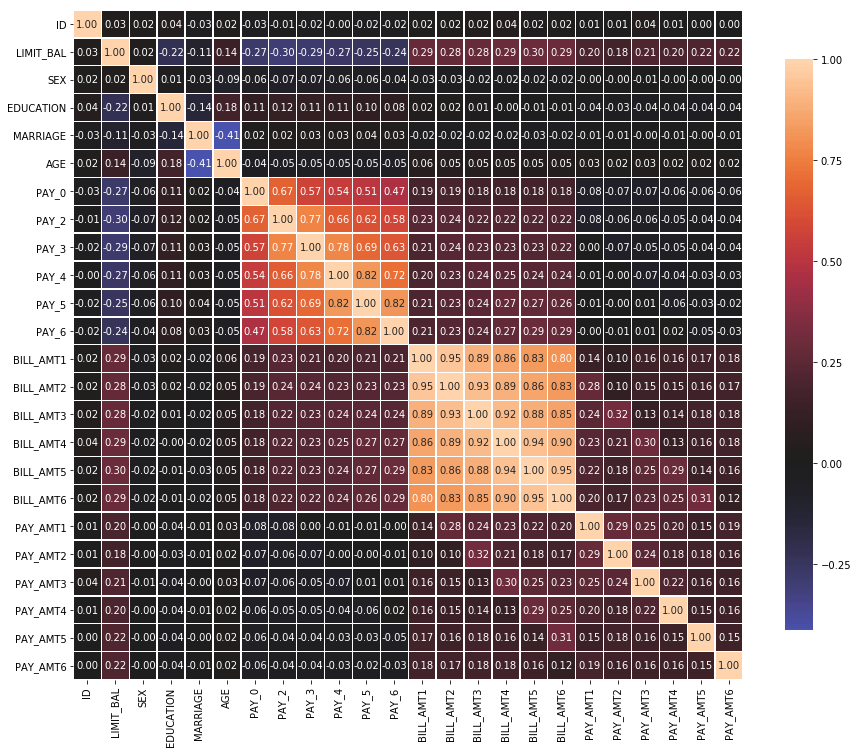

In [11]:
correlations = X.corr()

fig, ax = plt.subplots(figsize=(15,15))
sns.heatmap(correlations, vmax=1.0, center=0, fmt='.2f',
            square=True, linewidths=.5, annot=True, cbar_kws={"shrink": .70})
plt.show();

### Examining the distribution of variables
Specifically look at bill and pay

In [12]:
def draw_histograms(df, variables, n_rows, n_cols, n_bins):
    fig=plt.figure()
    for i, var_name in enumerate(variables):
        ax=fig.add_subplot(n_rows,n_cols,i+1)
        df[var_name].hist(bins=n_bins,ax=ax)
        ax.set_title(var_name)
    fig.tight_layout()
    plt.show()

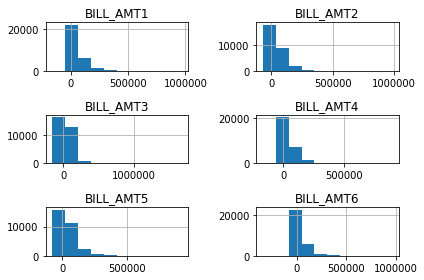

In [13]:
bills = df[['BILL_AMT1','BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6']]
draw_histograms(bills, bills.columns, 3, 2, 10)

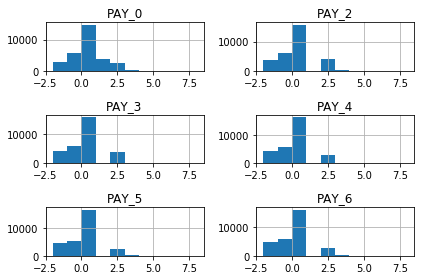

In [14]:
pays = df[['PAY_0', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6']]
draw_histograms(pays, pays.columns, 3, 2, 10)

We see that the distributions for pays are relatively similar hence the high correlation - same with bill_AMT

### Look at categorical variables for sparsity

Specifically looking at marriage and education

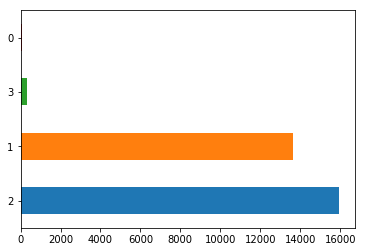

In [15]:
df.MARRIAGE.value_counts().plot(kind = "barh")

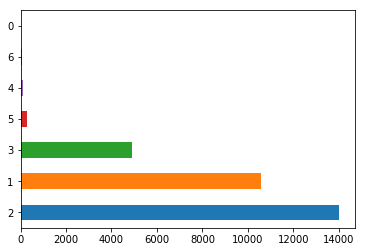

In [16]:
df.EDUCATION.value_counts().plot(kind = "barh")

### Data cleaning

To deal with the correlation issue, just drop Bill_AMT2 - Bill_AMT6 and PAY_2 - PAY_6 columns. The reason why we keep the first column is because it's August data

Because marriage = 0 can be classified as other set all 3s to 0

For Education: 0, 5, 6 can be considered as other and classified as 4

In [17]:
X.drop(['BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6'], axis=1, inplace=True)
X.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,BILL_AMT1,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
0,1,20000.0,2,2,1,24,2,3913.0,0.0,689.0,0.0,0.0,0.0,0.0
1,2,120000.0,2,2,2,26,-1,2682.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0
2,3,90000.0,2,2,2,34,0,29239.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0
3,4,50000.0,2,2,1,37,0,46990.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0
4,5,50000.0,1,2,1,57,-1,8617.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0


Looking at the correlation matrix again... 

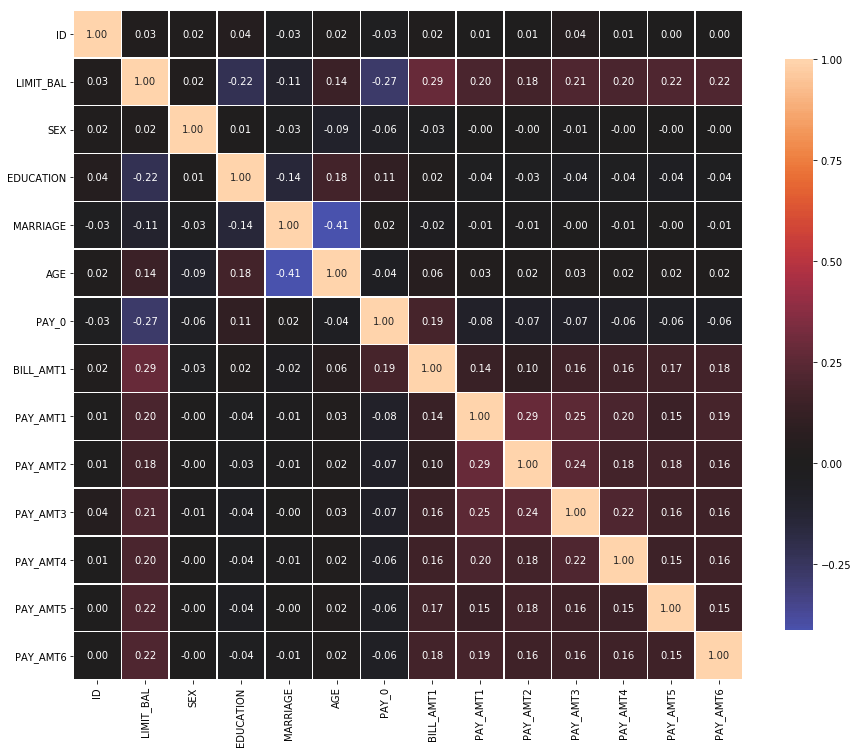

In [18]:
correlations = X.corr()

fig, ax = plt.subplots(figsize=(15,15))
sns.heatmap(correlations, vmax=1.0, center=0, fmt='.2f',
            square=True, linewidths=.5, annot=True, cbar_kws={"shrink": .70})
plt.show();

Now clean up the education and marriage columns as described earlier

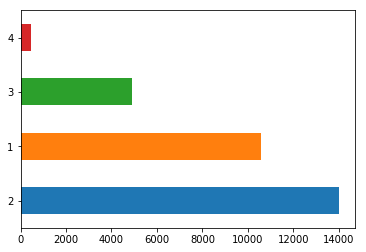

In [19]:
X.EDUCATION.replace([0,5,6],4,inplace=True)
X.EDUCATION.value_counts().plot(kind = "barh")

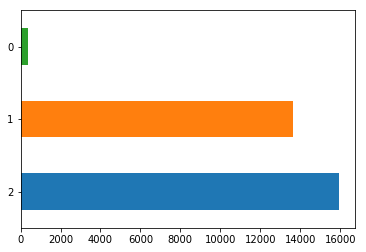

In [20]:
X.MARRIAGE.replace(3,0,inplace=True)
X.MARRIAGE.value_counts().plot(kind = "barh")

One-hot encode the categorical variables

In [21]:
X = pd.get_dummies(data=X, columns=['SEX', 'EDUCATION', 'MARRIAGE', 'PAY_0'])


### Feature engineering

May not do this

# Machine Learning

First iteration where we just run ML regression models on the raw unpreprocessed data and compare results after

## Random Forest

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
clf_rf = RandomForestClassifier(n_estimators=100, max_depth=5,random_state=0)

clf_rf.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=5, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=None,
            oob_score=False, random_state=0, verbose=0, warm_start=False)

In [23]:
y_pred_rf = clf_rf.predict(X_test)
rf_acc = accuracy_score(y_test, y_pred_rf)
rf_acc

0.814

Since random forest has the highest accuracy score, below would be exploring what are the best parameters to improve the score

In [24]:
from sklearn.model_selection import GridSearchCV

In [25]:
param_grid = {
    "n_estimators":[50, 100, 200],
    "criterion": ["gini", "entropy"],
    "max_depth": [1, 2, 5, 10]
    }  

In [26]:
clf_gs = GridSearchCV(clf_rf, param_grid, cv=5)

In [27]:
clf_gs.fit(X_train, y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=5, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=None,
            oob_score=False, random_state=0, verbose=0, warm_start=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'n_estimators': [50, 100, 200], 'criterion': ['gini', 'entropy'], 'max_depth': [1, 2, 5, 10]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [28]:
y_pred_gs = clf_gs.predict(X_test)
gs_acc = accuracy_score(y_test, y_pred_gs)
gs_acc

0.8203333333333334

In [29]:
clf_gs.best_params_

{'criterion': 'entropy', 'max_depth': 10, 'n_estimators': 200}

In [30]:
y_pred_gs = clf_gs.predict(X_train)
gs_acc = accuracy_score(y_train, y_pred_gs)
gs_acc

0.8329583333333334

Since the accuracy score of tunned ramdom forest has improved, below would be exploring by using
the current parameters as the lower bounds and increase as well to see if the score could be improved

In [31]:
param_grid = {
    "n_estimators":[200, 300, 500],
    "criterion": ["entropy"],
    "max_depth": [10, 15, 20]
    }

In [32]:
clf_gs2 = GridSearchCV(clf_rf, param_grid, cv=5)

In [33]:
clf_gs2.fit(X_train, y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=5, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=None,
            oob_score=False, random_state=0, verbose=0, warm_start=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'n_estimators': [200, 300, 500], 'criterion': ['entropy'], 'max_depth': [10, 15, 20]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [34]:
y_pred_gs2 = clf_gs2.predict(X_test)
gs2_acc = accuracy_score(y_test, y_pred_gs2)
gs2_acc

0.819

In [35]:
y_pred_gs3 = clf_gs2.predict(X_train)
gs3_acc = accuracy_score(y_train, y_pred_gs3)
gs3_acc

0.9635833333333333

There's around 15% difference, OVERFITTING!!! let's see what f1_score has to say.

In [36]:
from sklearn.metrics import f1_score

In [37]:
f1_score(y_test, y_pred_gs2) 

0.43962848297213625

## SVM

In [38]:
from sklearn import svm
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score

In [136]:
clf_svm= svm.SVC(gamma='scale', probability=True)
clf_svm.fit(X_train, y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
  max_iter=-1, probability=True, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [144]:
y_pred_svm = clf_svm.predict(X_test)
svm_acc = accuracy_score(y_test, y_pred_svm)
svm_acc

0.8185

In [145]:
f1_score(y_test, y_pred_svm) 

0.4259356879283079

In [146]:
confusion_matrix(y_test,y_pred_svm)

array([[4507,  180],
       [ 909,  404]])

In [147]:
y_score = clf_svm.predict_proba(X_test)[:,1]

In [148]:
fpr, tpr, thresholds = roc_curve(y_test, y_score)

AUC: 0.703053332035539


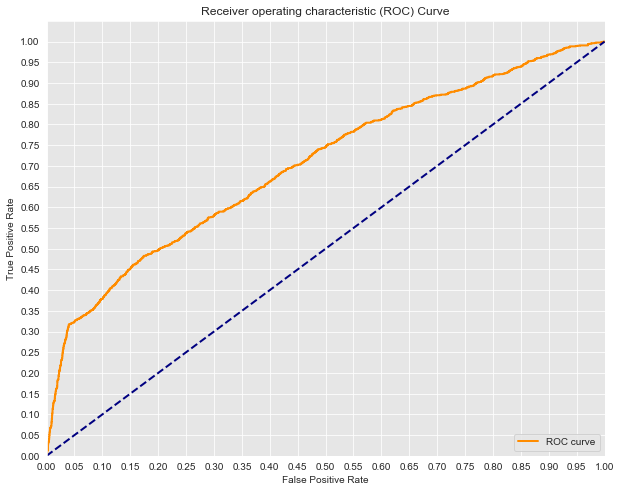

In [149]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

sns.set_style("darkgrid", {"axes.facecolor": ".9"})

print('AUC: {}'.format(auc(fpr, tpr)))
plt.figure(figsize=(10,8))
lw = 2
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve')
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.yticks([i/20.0 for i in range(21)])
plt.xticks([i/20.0 for i in range(21)])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

## Logistic Regression

In [41]:
from sklearn.linear_model import LogisticRegression

In [82]:
clf_lr = LogisticRegression(verbose=1)
clf_lr.fit(X_train, y_train)
y_pred_lr = clf_lr.predict(X_test)
lr_acc = accuracy_score(y_test, y_pred_lr)
lr_acc

/Users/victoria/anaconda3/envs/learn-env/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[LibLinear]

0.8195

In [83]:
f1_score(y_test, y_pred_lr) 

0.43387349712493456

In [84]:
confusion_matrix(y_test,y_pred_lr)

array([[4502,  185],
       [ 898,  415]])

In [88]:
from sklearn.metrics import roc_curve, auc

In [89]:
y_score = clf_lr.fit(X_train, y_train).decision_function(X_test)

/Users/victoria/anaconda3/envs/learn-env/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[LibLinear]

In [90]:
fpr, tpr, thresholds = roc_curve(y_test, y_score)

AUC: 0.7506796764592184


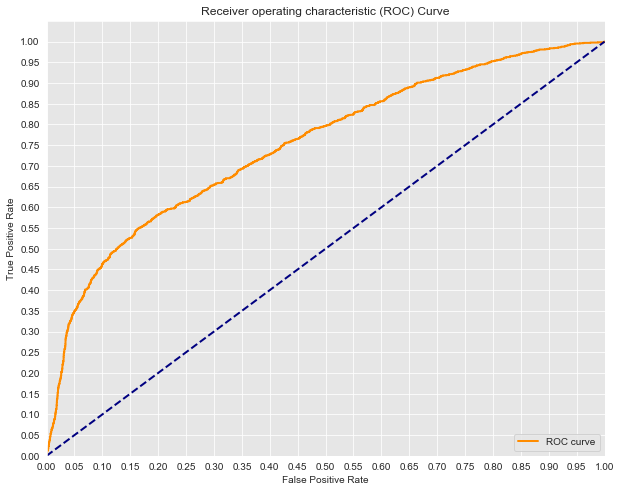

In [91]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

sns.set_style("darkgrid", {"axes.facecolor": ".9"})

print('AUC: {}'.format(auc(fpr, tpr)))
plt.figure(figsize=(10,8))
lw = 2
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve')
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.yticks([i/20.0 for i in range(21)])
plt.xticks([i/20.0 for i in range(21)])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

## Neural Network

In [44]:
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import StandardScaler  

In [45]:
scaler = StandardScaler() 
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

/Users/victoria/anaconda3/envs/learn-env/lib/python3.6/site-packages/sklearn/preprocessing/data.py:625: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/Users/victoria/anaconda3/envs/learn-env/lib/python3.6/site-packages/ipykernel_launcher.py:3: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/victoria/anaconda3/envs/learn-env/lib/python3.6/site-packages/ipykernel_launcher.py:4: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  after removing the cwd from sys.path.


In [102]:
clf_mlp = MLPClassifier(max_iter=300)
clf_mlp.fit(X_train, y_train)

MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(100,), learning_rate='constant',
       learning_rate_init=0.001, max_iter=300, momentum=0.9,
       n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
       random_state=None, shuffle=True, solver='adam', tol=0.0001,
       validation_fraction=0.1, verbose=False, warm_start=False)

In [103]:
y_pred_mlp = clf_mlp.predict(X_test)
mlp_acc = accuracy_score(y_test, y_pred_mlp)
mlp_acc

0.8065

Trying to find the best parameters for MLP

In [48]:
param_grid_mlp = {
    "solver":['lbfgs', 'sgd'],
    "hidden_layer_sizes": [(100, 2),(100,3),(75,4)]
    }

In [49]:
clf_gs_mlp = GridSearchCV(clf_mlp, param_grid_mlp, cv=5)

In [50]:
clf_gs_mlp.fit(X_train, y_train)

/Users/victoria/anaconda3/envs/learn-env/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/Users/victoria/anaconda3/envs/learn-env/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/Users/victoria/anaconda3/envs/learn-env/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(100,), learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
       random_state=None, shuffle=True, solver='adam', tol=0.0001,
       validation_fraction=0.1, verbose=False, warm_start=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'solver': ['lbfgs', 'sgd'], 'hidden_layer_sizes': [(100, 2), (100, 3), (75, 4)]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [51]:
y_pred_gs_mlp = clf_gs_mlp.predict(X_test)

In [52]:
mlp_acc = accuracy_score(y_test, y_pred_gs_mlp)
mlp_acc

0.8176666666666667

In [53]:
f1_score(y_test, y_pred_gs_mlp) 

0.4378211716341212

In [112]:
y_score = clf_mlp.fit(X_train, y_train).predict_proba(X_test)[:,1]

6000

In [150]:
fpr, tpr, thresholds = roc_curve(y_test, y_score)

AUC: 0.7485414031876018


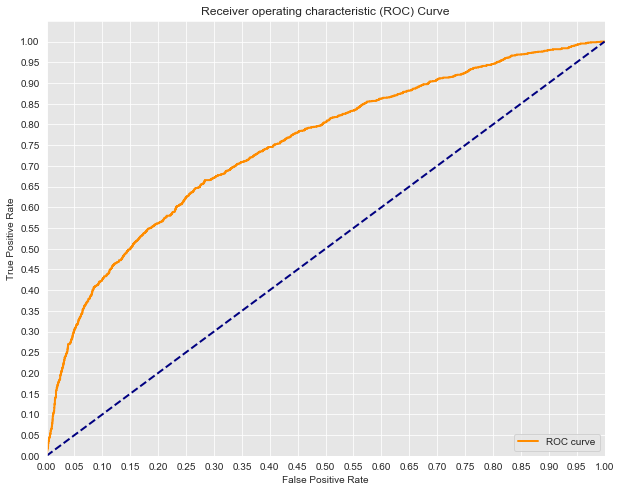

In [115]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

sns.set_style("darkgrid", {"axes.facecolor": ".9"})

print('AUC: {}'.format(auc(fpr, tpr)))
plt.figure(figsize=(10,8))
lw = 2
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve')
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.yticks([i/20.0 for i in range(21)])
plt.xticks([i/20.0 for i in range(21)])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()